In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv('sample_data/Q1_Dataset.csv')
df = df.drop_duplicates()
duplicate_rows = df[df.duplicated()]
print("Duplicate rows found:", len(duplicate_rows))

Duplicate rows found: 0


Average price per sqft by number of bedrooms:
Bedrooms
0.0    4.108525
1.0    5.136935
2.0    6.066527
3.0    6.330138
4.0    9.226984
Name: Price_per_Sqft, dtype: float64

Apartment count per bedroom type:
Bedrooms
0.0    70
1.0    91
2.0    48
3.0    34
4.0     5
Name: count, dtype: int64


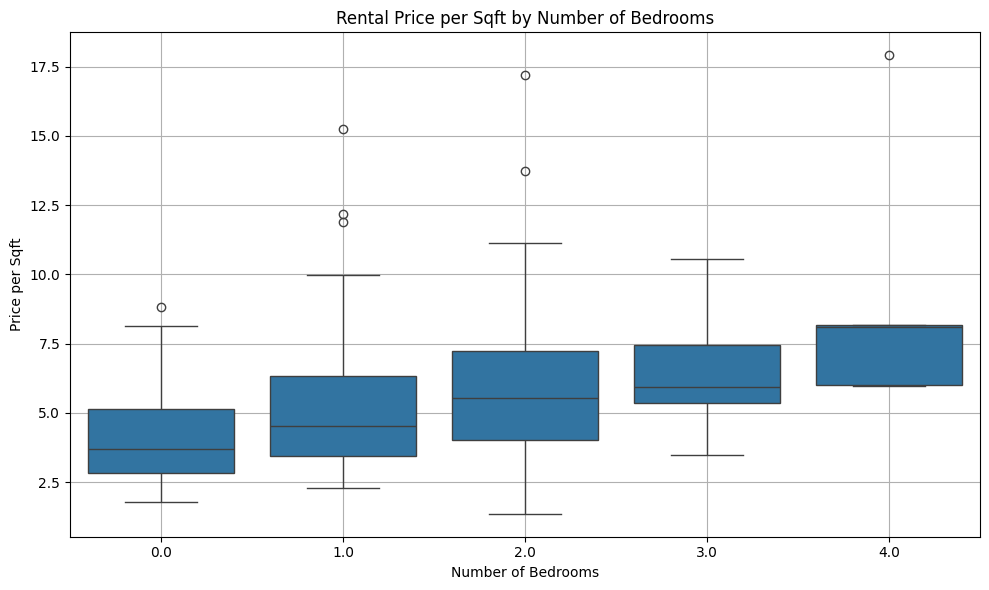

In [22]:
#Hypothesis 1 - Studios and 1-bedroom apartments have a higher rental price per square foot than larger apartments.

# Convert 'o' to 0 and ensure all values are numeric
df['Bedrooms'] = df['Bedrooms'].replace('o', 0)  # Replace letter 'o' with zero
df['Bedrooms'] = pd.to_numeric(df['Bedrooms'], errors='coerce')
df = df.dropna(subset=['Bedrooms'])


# Calculate price per square foot
df['Price_per_Sqft'] = df['Rental_Price'] / df['Size_in_Sqft']

# Group by number of bedrooms and calculate average price per sqft
price_per_bedroom = df.groupby('Bedrooms')['Price_per_Sqft'].mean().sort_index()
print("Average price per sqft by number of bedrooms:")
print(price_per_bedroom)

#Count how many listings per bedroom type
print("\nApartment count per bedroom type:")
print(df['Bedrooms'].value_counts().sort_index())

# Visualize using boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Bedrooms', y='Price_per_Sqft', data=df)
plt.title('Rental Price per Sqft by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price per Sqft')
plt.grid(True)
plt.tight_layout()
plt.show()

